In [1]:
from preprocessing import apply_OHE, preprocesado1, init_OHE

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import numpy as np
import pandas as pd
import auxiliar as aux

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import roc_auc_score

<h1>Boosting</h1>

<h3> Preprocesamiento 1: OHE y Reducción de las columnas: Barrio, Religion, Categoria de Trabajo, Estado Marital </h3>

In [2]:
X, y = aux.get_train_set(missings='category')

In [3]:
X = preprocesado1(X)
init_OHE(X)

In [4]:
X = apply_OHE(X)
X

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,barrio_palermo,categoria_de_trabajo_relacion_de_dependencia,estado_marital_otro,estado_marital_sin_matrimonio,genero_mujer,religion_judaismo,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,17,39,2174,40,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,50,0,13,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,38,0,40,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,53,0,40,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,28,0,40,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,0,38,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,13,40,0,40,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,13,58,0,40,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,13,22,0,20,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

Cosas probadas con la ramdom search:

    MXD (5, 16, 5), MSL (50, 151, 50), MXF ('log2', 'sqrt'), N_EST (101, 201, 100), LR (0.1, 0.01) LOSS ('deviance', 'exponential')
    
    Resultados:
       * MXD=10, MSL=50, N_EST=100, MXF='log2', LR=0.1, LOSS= 'dev' -> Score: 0.9183
       * MXD=5, MSL=50, N_EST=200, MXF='sqrt', LR=0.1, LOSS= 'dev' -> Score: 0.9191
       * MXD=5, MSL=50, N_EST=200, MXF='log2', LR=0.1, LOSS= 'dev' -> Score: 0.9191
       * MXD

In [46]:
#'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 6), 'min_samples_leaf': np.arange(35, 46), 'n_estimators': np.arange(1, 1001, 10), 'max_features': ['sqrt']

parameters = {'max_depth': np.arange(5, 16, 5), 'min_samples_leaf': np.arange(50, 151, 50),'n_estimators': np.arange(100,301,100),
              'max_features': ['sqrt', 'log2'], 'loss':['deviance', 'exponential'], 'learning_rate': np.array([0.1, 0.01])}

clf = GradientBoostingClassifier(random_state = 0)

rscv = RandomizedSearchCV(
    clf,  parameters, n_iter=60, scoring='roc_auc', cv=5, return_train_score=True,
).fit(X_train, y_train)

In [47]:
print(f"Best score: {rscv.best_score_}")
print(f"Best params {rscv.best_params_}")

Best score: 0.9221916506754091
Best params {'n_estimators': 200, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.1}


In [48]:
model_boosting = rscv.best_estimator_
model_boosting

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=50, n_estimators=200,
                           random_state=0)

In [45]:
rscv.score(X_test, y_test)

0.9191356193640248

In [15]:
y_pred = model_boosting.predict(X_test)
accuracy_score(y_test, y_pred)

0.8638108398587441

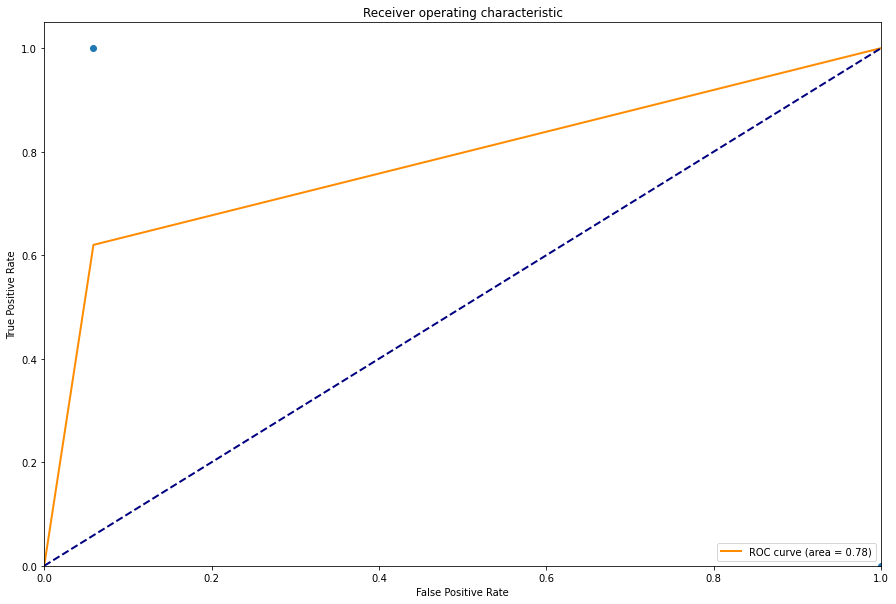

In [16]:
aux.plot_roc_curve(y_test, y_pred)

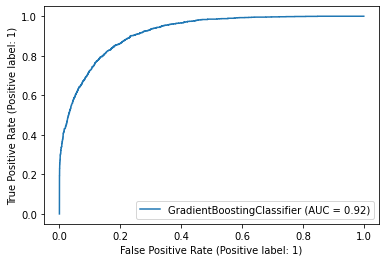

In [18]:
plot_roc_curve(model_boosting, X_test, y_test, response_method="predict_proba")
plt.show()

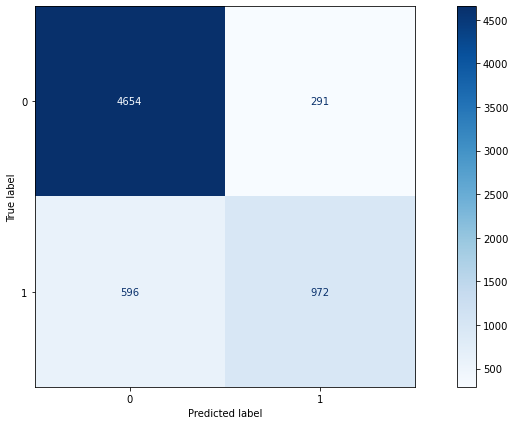

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    model_boosting, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4945
           1       0.77      0.62      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [21]:
calibrated_clf = CalibratedClassifierCV(base_estimator=model_boosting, cv="prefit")
calibrated_clf.fit(X_test, y_test)

CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(max_depth=10,
                                                                 max_features='log2',
                                                                 min_samples_leaf=50,
                                                                 random_state=0),
                       cv='prefit')

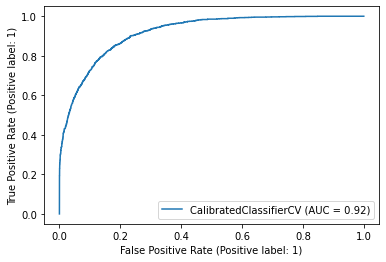

In [22]:
plot_roc_curve(calibrated_clf, X_test, y_test, response_method="predict_proba")
plt.show()

In [23]:
print(f"test score: {calibrated_clf.score(X_test, y_test)}")

test score: 0.8639643789344388


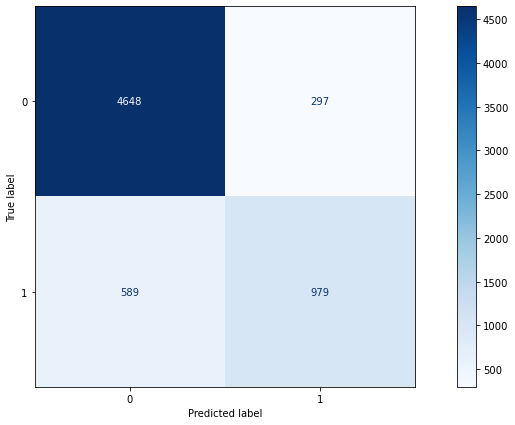

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    calibrated_clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4945
           1       0.77      0.62      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [30]:
np.arange(1,5,1)

array([1, 2, 3, 4])